In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3819,6174-NRBTZ,Male,0,No,No,46,No,No phone service,DSL,Yes,...,No,No,No,No,One year,Yes,Bank transfer (automatic),30.75,1489.3,No
6460,8761-NSOBC,Male,0,No,No,44,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,100.55,4398.15,Yes
4968,2197-OMWGI,Female,1,Yes,Yes,68,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,53.00,3656.25,No
821,5318-YKDPV,Male,0,Yes,Yes,43,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.15,3566.6,No
2234,4500-HKANN,Male,0,Yes,Yes,23,Yes,Yes,DSL,No,...,No,Yes,No,No,Two year,No,Mailed check,59.70,1414.2,No


In [125]:
df.drop('customerID',axis='columns',inplace=True)

In [126]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [127]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [128]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [129]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

In [130]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [131]:
df.iloc[488]['TotalCharges']

' '

In [132]:
df.shape

(7043, 20)

In [133]:
df1=df[df.TotalCharges!=' ']

In [134]:
df1.shape

(7032, 20)

In [135]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\isuru\anaconda3\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [136]:
df1.TotalCharges.dtypes

dtype('float64')

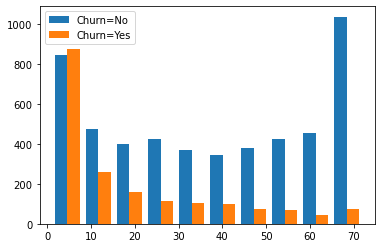

In [137]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_no,tenure_churn_yes],label=['Churn=No','Churn=Yes'])
plt.legend()

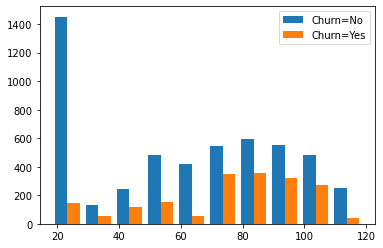

In [138]:
tenure_churn_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([tenure_churn_no,tenure_churn_yes],label=['Churn=No','Churn=Yes'])
plt.legend()

In [139]:
for column in df1:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [140]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')
    

In [141]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [142]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)

C:\Users\isuru\anaconda3\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [143]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [145]:
yes_no_columns=['Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PaperlessBilling',
       'Churn']

In [147]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\isuru\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [149]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [150]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\isuru\anaconda3\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [151]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [152]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1400,0,0,0,1,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6755,0,0,0,0,42,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
669,1,0,1,0,70,0,0,0,1,1,...,1,0,0,0,0,1,1,0,0,0


In [153]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [154]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [155]:
X=df2.drop('Churn',axis='columns')
y=df2.Churn

In [156]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [157]:
import tensorflow as tf
from tensorflow import keras

model= keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5334 - accuracy: 0.7271
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4287 - accuracy: 0.7975
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4190 - accuracy: 0.8048
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8050
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4132 - accuracy: 0.8076
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4115 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4099 - accuracy: 0.8041: 0s - loss: 0.416
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4079 - accuracy: 0.8123
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4065 - accuracy: 0.8082
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - los

176/176 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8270
Epoch 81/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3666 - accuracy: 0.8254
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8265
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3649 - accuracy: 0.8252
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3649 - accuracy: 0.8284
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3644 - accuracy: 0.8265
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8293
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3635 - accuracy: 0.8304: 0s - loss: 0
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3646 - accuracy: 0.8249: 0s - loss: 0.3535 - ac
Epoch 89/100
176/176 [==============================] - 1

In [158]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4738 - accuracy: 0.7719


[0.47381269931793213, 0.7718549966812134]

In [159]:
yp=model.predict(X_test)

In [160]:
yp[:5]

array([[0.35957086],
       [0.05682456],
       [0.21176523],
       [0.22040641],
       [0.25192308]], dtype=float32)

In [161]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [162]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1030
           1       0.58      0.56      0.57       377

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407



Text(69.0, 0.5, 'True')

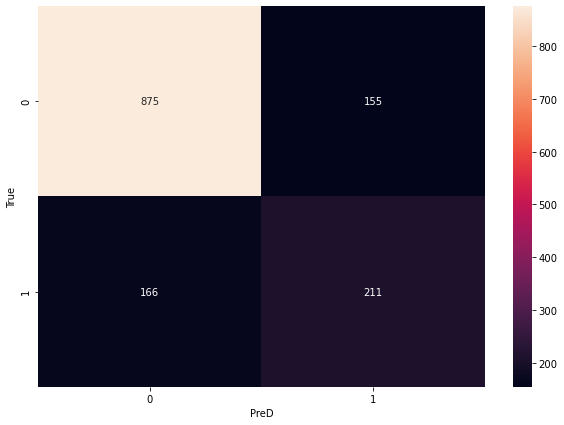

In [163]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('PreD')
plt.ylabel('True')

# Accuracy

In [164]:
(875+211)/(875+211+166+155)

0.7718550106609808

# Precision for 0 class

In [165]:
875/(875+166)

0.840537944284342

# Recall for 0 class

In [166]:
875/(875+155)

0.8495145631067961